# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [192]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [193]:
# place your code into this Code cell
df = pd.read_csv ('2018_-_2019_Career_Technical_Education_Report.csv') #the dataset comes from NYC Open Data

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

Show 5 rows, selected at random, from the data set:

In [194]:
df.sample(5)

,DBN,School Name,CTE Designated High School,Program CIP Code,Program Name,Industry Cluster,Number of Industry Partners,Is NYSED Approved,Grade Levels Served,Enrolled Student Counts,Number of Staff Attending DOE CTE PD
105,13K605,George Westinghouse Career and Technical Educa...,True,111004,Web/Multimedia Management and Webmaster,Information Technology Cluster,2,Non-Approved,9101112.0,176,18
118,15K497,The Boerum Hill School for International Studies,False,120599,"Culinary Arts and Related Services, Other",Hospitality and Tourism Cluster,5,Approved,9101112.0,218,3
140,19K615,Transit Tech Career and Technical Education Hi...,True,470104,Computer Installation and Repair Technology/Te...,Information Technology Cluster,2,Approved,9101112.0,219,17
171,21K690,Brooklyn Studio Secondary School,False,500102,Digital Arts,"Arts, Audio/Video Technology and Communication...",3,Approved,9101112.0,274,6
51,03M402,The Urban Assembly School for Green Careers,True,460401,Building/Property Maintenance and Manager,Architecture and Construction Cluster,7,Approved,9101112.0,189,8


Show each of the column names and their data types:

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DBN                                   301 non-null    object 
 1   School Name                           301 non-null    object 
 2   CTE Designated High School            301 non-null    bool   
 3   Program CIP Code                      301 non-null    int64  
 4   Program Name                          301 non-null    object 
 5   Industry Cluster                      301 non-null    object 
 6   Number of Industry Partners           301 non-null    int64  
 7   Is NYSED Approved                     301 non-null    object 
 8   Grade Levels Served                   296 non-null    float64
 9   Enrolled Student Counts               301 non-null    int64  
 10  Number of Staff Attending DOE CTE PD  301 non-null    int64  
dtypes: bool(1), float64

Show any unique features of your chosen data set.

My dataset is unqiue because I found that the Enrolled Student Counts and Number of Staff Attending DOE CTE PD do NOT denpend on whether a school is CTE Designated High School or not, which is different from the majority's expectation. Besides, whether a school is NYSED Approved or not also does not account for Enrolled Student Counts and Number of Staff Attending DOE CTE PD. Additionally, each school has an unqiue DBN code and their programs have a unique Program CIP Code. 

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

since I don't want to change my original dataset but make a copy of it, I will:

In [196]:
local_df = df

1.drop rows with missing values

In [197]:
local_df=df.dropna()
local_df.sample(5)

,DBN,School Name,CTE Designated High School,Program CIP Code,Program Name,Industry Cluster,Number of Industry Partners,Is NYSED Approved,Grade Levels Served,Enrolled Student Counts,Number of Staff Attending DOE CTE PD
237,28Q620,Thomas A. Edison Career and Technical Educatio...,True,150405,Robotics Technology/Technician,Manufacturing Production Cluster,2,Approved,9101112.0,164,29
151,19K764,The Urban Assembly School for Collaborative He...,True,519999,Health Professions and Related Clinical Servic...,Health Science Cluster,5,Non-Approved,9101112.0,184,8
74,08X559,School for Tourism and Hospitality,False,520903,Tourism and Travel Services Management,Hospitality and Tourism Cluster,1,Non-Approved,9101112.0,201,3
93,11X270,Academy for Scholarship and Entrepreneurship: ...,False,520701,Entrepreneurship/Entrepreneurial Studies,Business Management and Administration Cluster,5,Approved,9101112.0,326,10
199,25Q460,Flushing High School,False,520101,"Business/Commerce, General",Business Management and Administration Cluster,5,Approved,9101112.0,160,7


In [198]:
local_df.info() # we could also find that this data munging works because we now have 296 entries instead of 300 entries.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 300
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DBN                                   296 non-null    object 
 1   School Name                           296 non-null    object 
 2   CTE Designated High School            296 non-null    bool   
 3   Program CIP Code                      296 non-null    int64  
 4   Program Name                          296 non-null    object 
 5   Industry Cluster                      296 non-null    object 
 6   Number of Industry Partners           296 non-null    int64  
 7   Is NYSED Approved                     296 non-null    object 
 8   Grade Levels Served                   296 non-null    float64
 9   Enrolled Student Counts               296 non-null    int64  
 10  Number of Staff Attending DOE CTE PD  296 non-null    int64  
dtypes: bool(1), float64

2.sort the school name by ascending order 

In [199]:
local_df = local_df.sort_values(by='School Name', ascending=True)
local_df.head(5) #since I am doing a ranking here so I have to use head() instead of sample()

,DBN,School Name,CTE Designated High School,Program CIP Code,Program Name,Industry Cluster,Number of Industry Partners,Is NYSED Approved,Grade Levels Served,Enrolled Student Counts,Number of Staff Attending DOE CTE PD
104,13K499,ACORN Community High School,False,110201,"Computer Programming/Programmer, General",Information Technology Cluster,1,Non-Approved,9101112.0,123,1
159,21K410,Abraham Lincoln High School,False,510808,Veterinary/Animal Health Technology/Technician...,Health Science Cluster,2,Approved,9101112.0,336,6
160,21K410,Abraham Lincoln High School,False,520701,Entrepreneurship/Entrepreneurial Studies,Business Management and Administration Cluster,3,Non-Approved,9101112.0,66,6
254,30Q301,Academy for Careers in Television and Film,True,500602,Cinematography and Film/Video Production,"Arts, Audio/Video Technology and Communication...",5,Approved,9101112.0,564,1
133,17K751,Academy for Health Careers,True,511614,Nurse/Nursing Assistant/Aide and Patient Care ...,Health Science Cluster,1,Non-Approved,9101112.0,302,3


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

1.Find How many schools are approved or not approved by NYSED

In [200]:
local_df['Is NYSED Approved'].value_counts() #run the the cleared dataset after data munging 

Approved        149
Non-Approved    147
Name: Is NYSED Approved, dtype: int64

2.get basic statistics reagrding Enrolled Student Counts e.g. the mean of Enrolled Students is 239 with 296 counts. 

In [245]:
local_df['Enrolled Student Counts'].describe() # we will find data like mean is 239 students

count     296.000000
mean      239.013514
std       250.887779
min         1.000000
25%        95.750000
50%       175.500000
75%       313.500000
max      2341.000000
Name: Enrolled Student Counts, dtype: float64

3.show 5 schools with highest number of Staff Attending DOE CTE PD
(Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.)

In [202]:
local_df.groupby('School Name')["Number of Staff Attending DOE CTE PD"].mean().sort_values().tail(5)

School Name
New Dorp High School                                  18.0
Queens Technical High School                          18.0
George Westinghouse Career and Technical Education    18.0
Bayside High School                                   19.0
Thomas A. Edison Career and Technical Education Hi    29.0
Name: Number of Staff Attending DOE CTE PD, dtype: float64

4.Find 5 schools with highest number of Industry Partners with name,program name,and whether the school is a CTE Designated High School provided
(Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.)

In [249]:
local_df[ ["School Name", "CTE Designated High School", "Program Name","Number of Industry Partners"] ].sort_values(by="Number of Industry Partners", ascending=False).head(5)

,School Name,CTE Designated High School,Program Name,Number of Industry Partners
273,Curtis High School,False,Criminal Justice/Police Science,36
230,Hillcrest High School,False,"Corrections and Criminal Justice, Other",17
267,New Dorp High School,False,"Corrections and Criminal Justice, Other",15
1,The Urban Assembly School for Emergency Manage...,True,"Security and Protective Services, Other",14
198,Flushing High School,False,"Corrections and Criminal Justice, Other",13


Since the code is too long and could not be shown completely, I will add a markdown here about the code:

local_df[ ["School Name", "CTE Designated High School", "Program Name","Number of Industry Partners"] ].sort_values(by="Number of Industry Partners", ascending=False).head(5)

5.Find How many schools are/ are not CTE Designated High School

In [204]:
local_df['CTE Designated High School'].value_counts()

False    171
True     125
Name: CTE Designated High School, dtype: int64

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

In [205]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

1.bar chart 

For High schools in NYC with Career and Technical Education programs, Thomas A. Edison Career and Technical Education High school (TAE) has the highest number of Staff Attending DOE CTE PD, which is 29. The remaining 4 high schools also have relatively high number of Staff Attending DOE CTE PD, which is around 18 and 19. 

In [206]:
local_df.groupby('School Name')["Number of Staff Attending DOE CTE PD"].mean().sort_values().tail(5)

School Name
New Dorp High School                                  18.0
Queens Technical High School                          18.0
George Westinghouse Career and Technical Education    18.0
Bayside High School                                   19.0
Thomas A. Edison Career and Technical Education Hi    29.0
Name: Number of Staff Attending DOE CTE PD, dtype: float64

Text(0, 0.5, 'Number of Industry Partners')

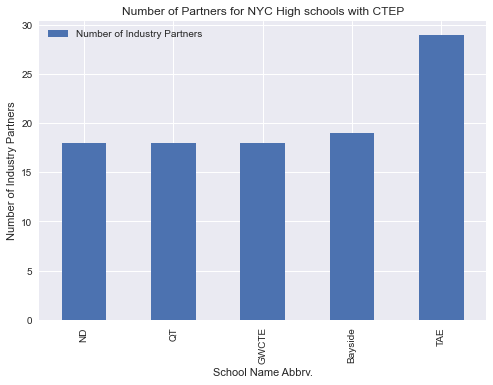

In [240]:
plotdata = pd.DataFrame(
    {"Number of Industry Partners":[18, 18, 18, 19, 29]},
    index=["ND", "QT", "GWCTE", "Bayside", "TAE"]) 
#because the school name is too long, so I have to hard code to rename them to make them show properly on x-axis
plotdata.plot(kind="bar")
plt.title('Number of Partners for NYC High schools with CTEP') 
#CTEP stands for Career and Technical Education programs
plt.xlabel("School Name Abbrv.")
plt.ylabel("Number of Industry Partners")

2.line chart

Among these 5 samples (rank alphabetically first after my data munging),enrolled Student Counts varies and this does not depend on whether this school is a CTE Designated High School. Accoridng to the line chart, we could easily find which school has highest number of students enrolled and which one has lowest. For example, among these 5 schools, we could find that the Academy for Careers in Television and Film (DBN:30Q301) has highest number of students enrolled, which is 564. 

Text(0, 0.5, 'Enrolled Student Counts')

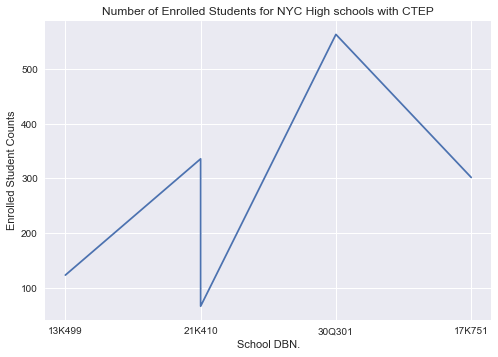

In [246]:
x2=local_df.head(5)["DBN"] 
#Because the school name is too long and will affect the display of x-axis, I used DBN to represent different schools 
y2=local_df.head(5)["Enrolled Student Counts"]
plt.plot(x2, y2)
plt.title('Number of Enrolled Students for NYC High schools with CTEP')
plt.xlabel("School DBN.")
plt.ylabel("Enrolled Student Counts")

3.bar chart

According to the bar chart, we could tell that the majority of high schools with Career and Technical Education programs in NYC has all 9th,10th, 11th, and 12th grades served. And there are only limited number of schools with only certain grade levels served. 

In [243]:
local_df['Grade Levels Served'].value_counts()

9101112.0    246
101112.0      27
1112.0        10
91011.0        4
91112.0        3
911.0          2
11.0           2
91012.0        1
910.0          1
Name: Grade Levels Served, dtype: int64

Text(0, 0.5, 'Number of Schools')

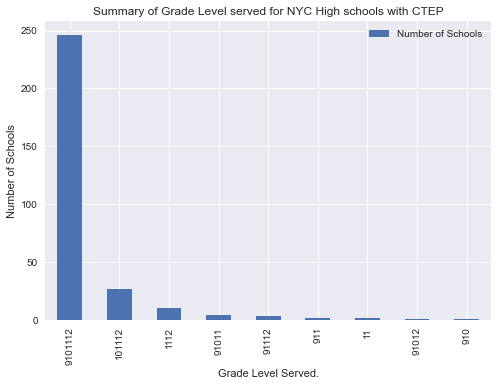

In [244]:
plotdata = pd.DataFrame(
    {"Number of Schools":[246, 27, 10, 4, 3,2,2,1,1]},
    index=["9101112", "101112", "1112", "91011", "91112",'911','11','91012','910']) 
#because the school name is too long, so I have to hard code to rename them to make them show properly on x-axis
plotdata.plot(kind="bar")
plt.title('Summary of Grade Level served for NYC High schools with CTEP') 
#CTEP stands for Career and Technical Education programs
plt.xlabel("Grade Level Served.")
plt.ylabel("Number of Schools")

4.pie chart

High schools in NYC with Career and Technical Education programs are not all CTE Designated High School. Actually, there are fewer schools are CTE Designated. 

array([<AxesSubplot:ylabel='CTE Designated High School'>], dtype=object)

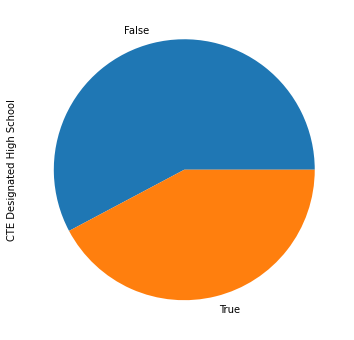

In [134]:
new_df=local_df['CTE Designated High School'].value_counts()
new_df.plot.pie(subplots=True, figsize=(11, 6))

5.pie chart 

High schools in NYC with Career and Technical Education programs are composed of about half NYSED Approved and half not NYSED Approved. Combined with previous pie chart no.4, we could conclude that in NYC, becoming a CTE Designated High School is more difficult than NYSED Approved. 

array([<AxesSubplot:ylabel='Is NYSED Approved'>], dtype=object)

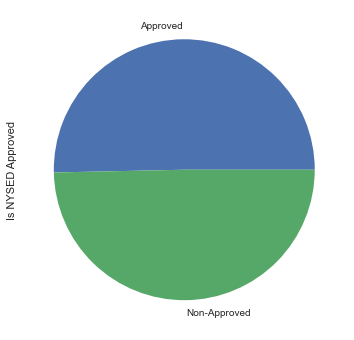

In [235]:
new_df=local_df['Is NYSED Approved'].value_counts()
new_df.plot.pie(subplots=True, figsize=(11, 6))